# Data visualization using two feature variables

# Bivariate Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

## step 2 - Data Cleaning
### segment 2- Data Type

In [2]:
df=pd.read_csv("bank_marketing_updated_v1.csv")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### segment - 3 (Fixing rows and columns)

In [3]:
df=pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
df.drop("customerid",axis=1,inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#Extract job in newly created 'job' column from "jobedu" column.
df['job']=df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [6]:
#Extract education in newly created 'education' column from "jobedu"column.

df['education']=df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
#droping jobedu
df.drop('jobedu',axis=1,inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
df[df.month.apply(lambda x: isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [9]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Segment-4 Impute/Remove missing values

In [10]:
#missing value in age colunmn
df.age.isnull().sum()

20

In [11]:
df.shape

(45211, 19)

In [12]:
#percentage of missing value in age column
float(100.0*20/45211)

0.04423702196368141

In [13]:
#drop the records with age missing in df and copy in inp1 dataframe.
inp1=df[-df.age.isnull()].copy()
inp1.shape

(45191, 19)

In [14]:
print(45211-45191)

20


In [15]:
#missing value in month colunmn
inp1.month.isnull().sum()

50

In [16]:
inp1.shape

(45191, 19)

In [17]:
#percentage of missing value in month column
float(100.0*50/45211)

0.11059255490920351

In [18]:
#drop the records with age missing in inp1 and copy in inp1 dataframe.
#df2=inp1[-inp1.age.isnull()].copy()
#df2.shape

In [19]:
#find the mode of month in inp1
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [20]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)
inp1.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [21]:
inp1.month.isnull().sum()

0

In [22]:
#finding missing value in response col inp1
inp1.response.isnull().sum()

30

In [23]:
inp1.shape

(45191, 19)

In [24]:
#percentage of missing value
float(100.0*30/45191)

0.06638489964816004

In [25]:
#drop the recoed with response missing in inp1
inp1= inp1[~inp1.response.isnull()]

In [26]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [27]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [28]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## Session- 4, Bivariate and Multivariate Analysis

 ## Segment-2, Numeric- numeric analysis

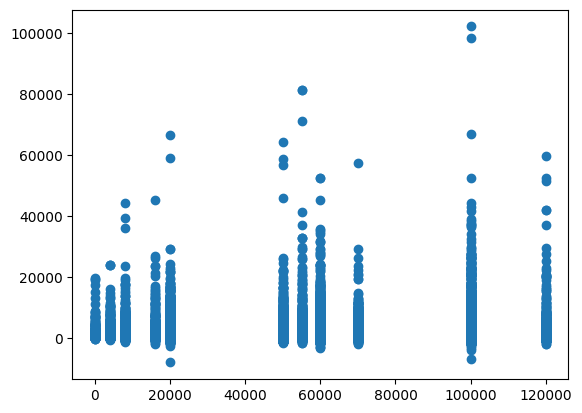

In [29]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

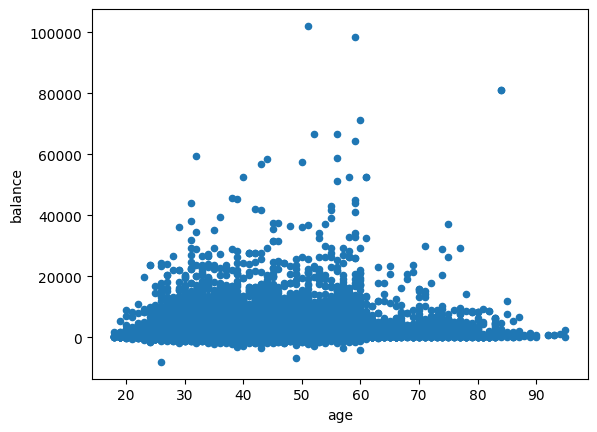

In [30]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x='age', y='balance')
plt.show()

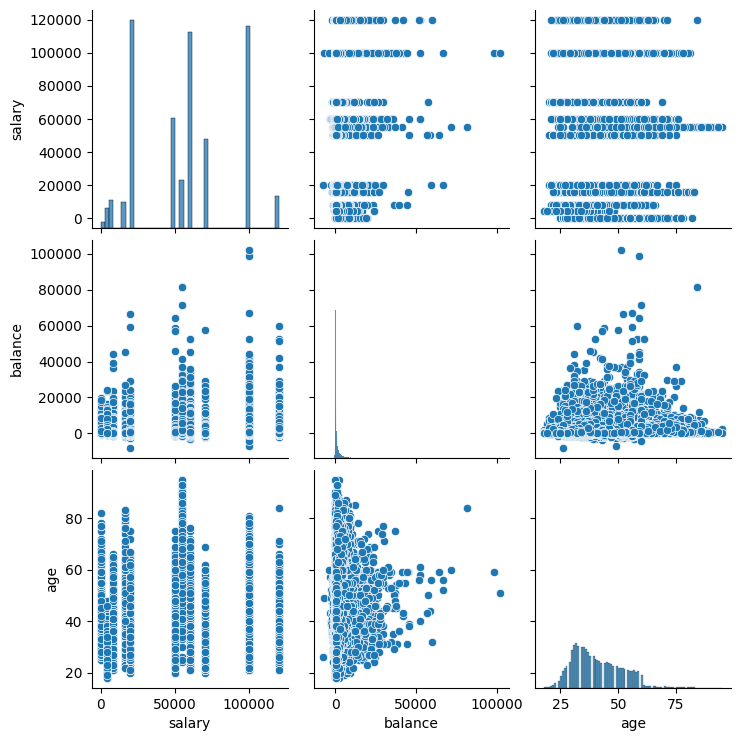

In [31]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=["salary","balance", "age"])
plt.show()

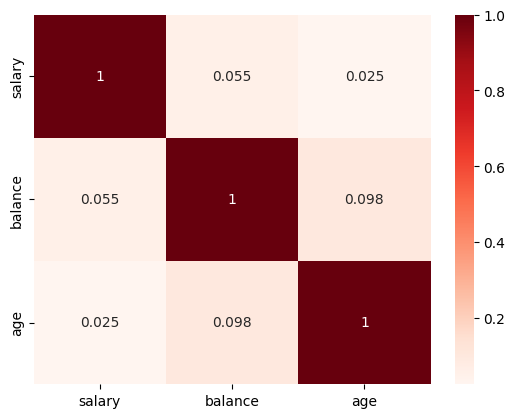

In [32]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap( inp1[["salary","balance", "age"]].corr(), annot= True,cmap= "Reds")
plt.show()

### Segment- 4, Numerical categorical variable
### Salary vs response


In [33]:
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [34]:
inp1.groupby("response")['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

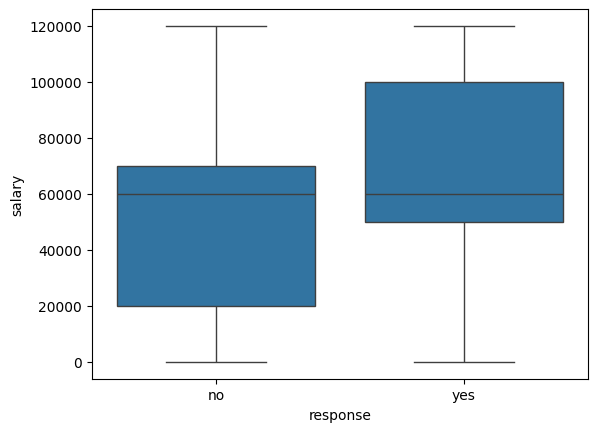

In [35]:
sns.boxplot(data=inp1,x='response',y='salary')
plt.show()

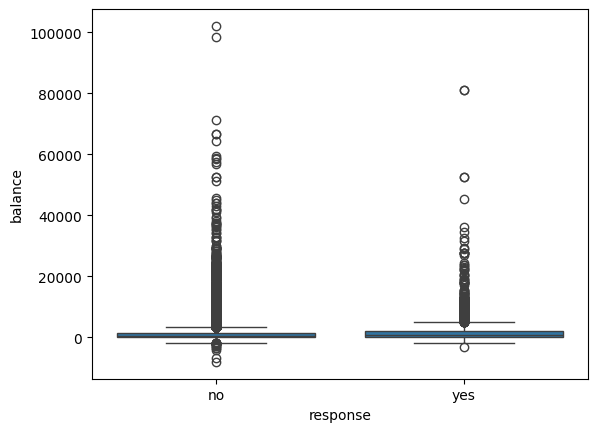

In [36]:
sns.boxplot(data=inp1,x='response',y='balance')
plt.show()

In [37]:
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [38]:
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [39]:
def p75(x):
    print("Input Data:", x)
    return np.quantile(x,0.75)

In [40]:
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

Input Data: 0        2143
1          29
2           2
3        1506
4           1
         ... 
45194     138
45198    1428
45199    1475
45209     668
45210    2971
Name: balance, Length: 39876, dtype: int64
Input Data: 83       2343
86         45
87       1270
129      2476
168       184
         ... 
45204    2850
45205     505
45206     825
45207    1729
45208    5715
Name: balance, Length: 5285, dtype: int64


,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


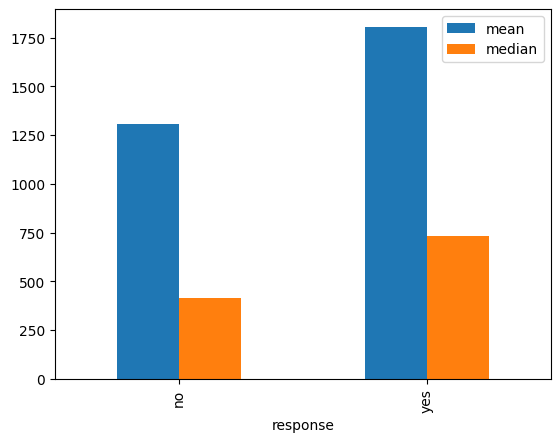

In [41]:
inp1.groupby("response")["balance"].agg(["mean","median"]).plot.bar()
plt.show()

### Education vs salary


In [42]:
inp1.groupby("education")["salary"].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [43]:
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

### Job vs salary


In [44]:
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [45]:
inp1.groupby('job')['salary'].median()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

## Segment- 5, Categorical categorical variable

In [47]:
#create response_flag of numerical data type where response "yes"= 1,"no"= 0
inp1["response_flag"]=np.where(inp1.response=="yes", 1, 0)
inp1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [48]:
inp1.response.value_counts(normalize= True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

In [49]:
inp1.response_flag.mean()

0.1170257523084077

## Education vs response rate

In [51]:
#calculate the mean of response_flag with different educationcategories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

## Marital vs response rate

In [52]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(["marital"])["response_flag"].mean()


marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

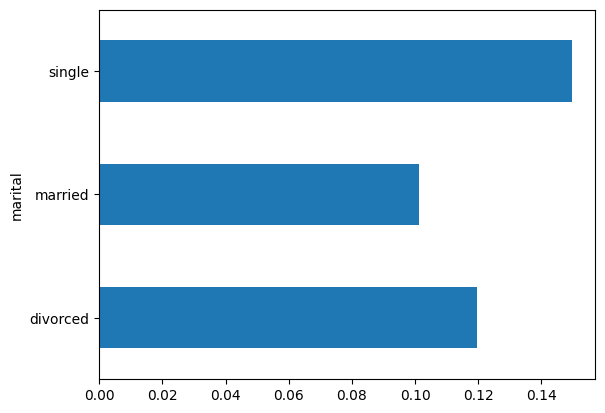

In [54]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

## Loans vs response rate

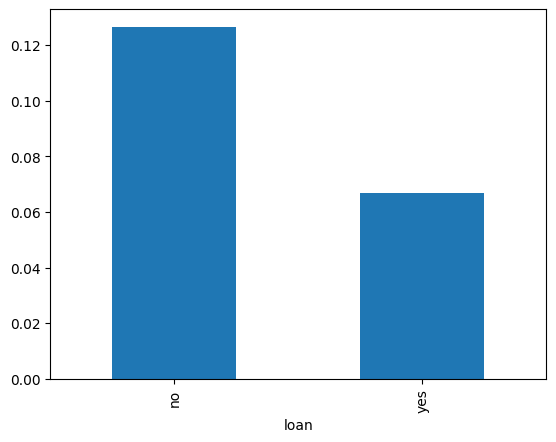

In [55]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(["loan"])["response_flag"].mean().plot.bar()
plt.show()


## Housing loans vs response rate

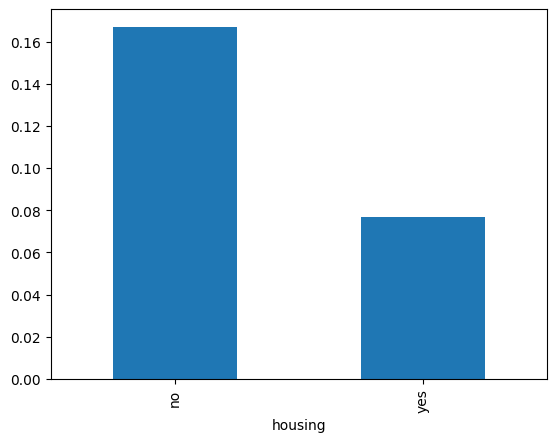

In [56]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(["housing"])["response_flag"].mean().plot.bar()
plt.show()


## Age vs response

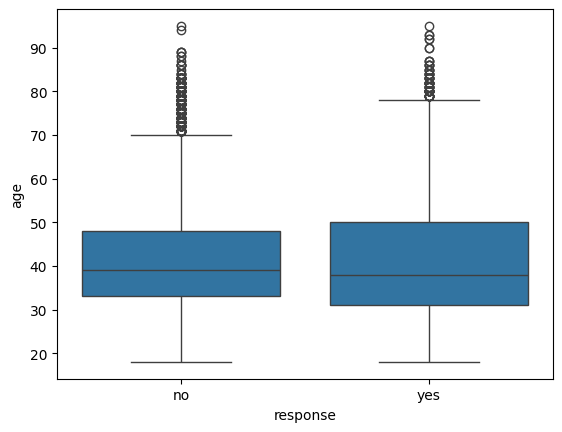

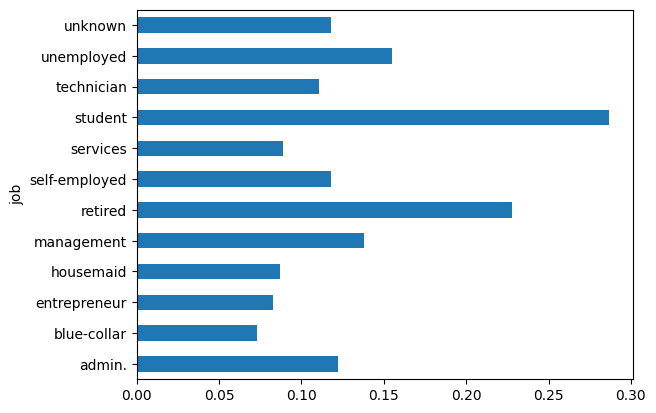

In [57]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1, x="response",y="age")
plt.show()

#plot the bar graph of job categories with response_flag mean value.
inp1.groupby(['job'])['response_flag'].mean().plot.barh()
plt.show()
